In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [5]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [6]:
df=pd.read_csv('C:/Users/Sushree Jena/Desktop/happymonk/bank_notes.csv')

In [7]:
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
#Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
#Checking for missing values

df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [10]:
#Target column class counts

df['Target'].value_counts()

0    762
1    610
Name: Target, dtype: int64

In [11]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

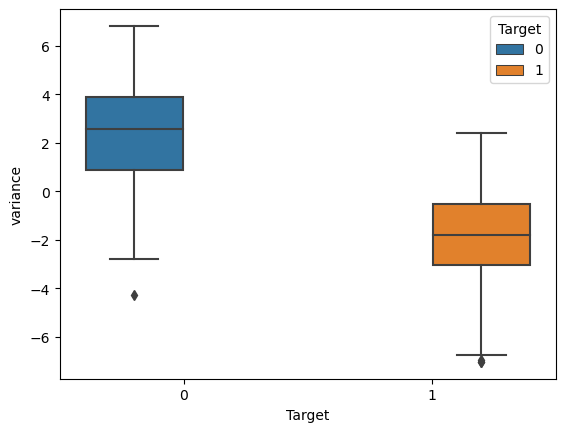

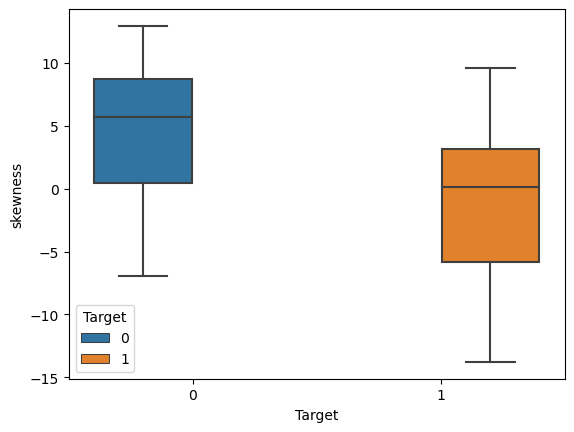

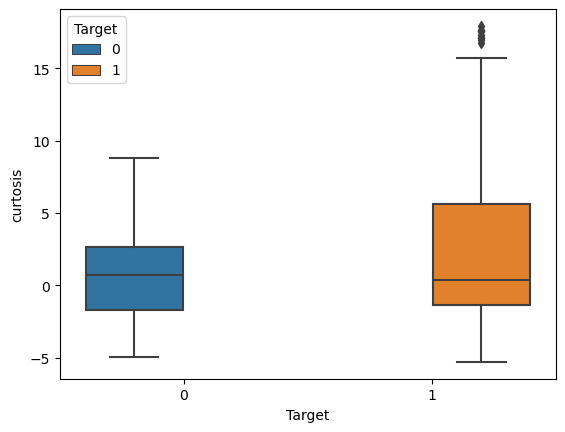

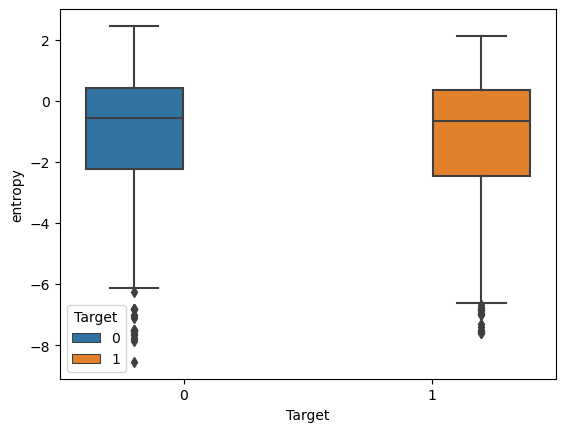

In [12]:
#Checking for outliers w.r.t. target column

cols=['variance', 'skewness', 'curtosis', 'entropy']
for col in cols:
    sns.boxplot(x='Target',y=df[col],hue='Target',data=df)
    plt.show()

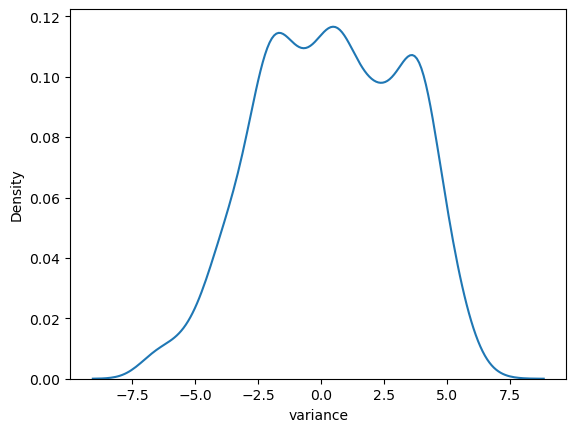

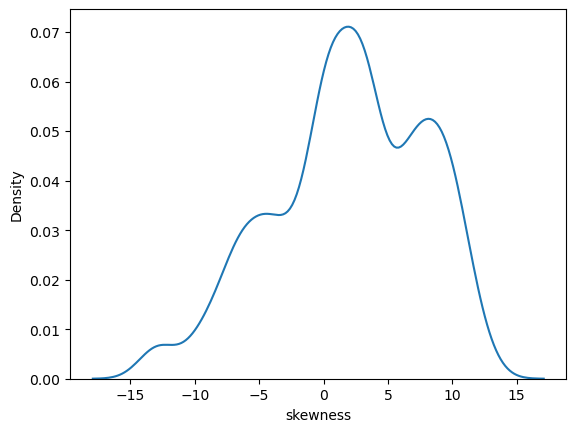

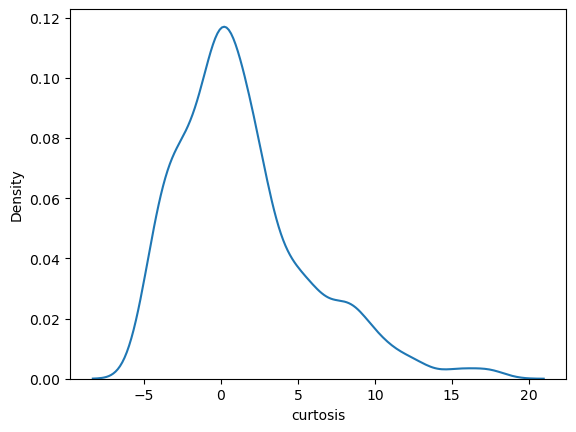

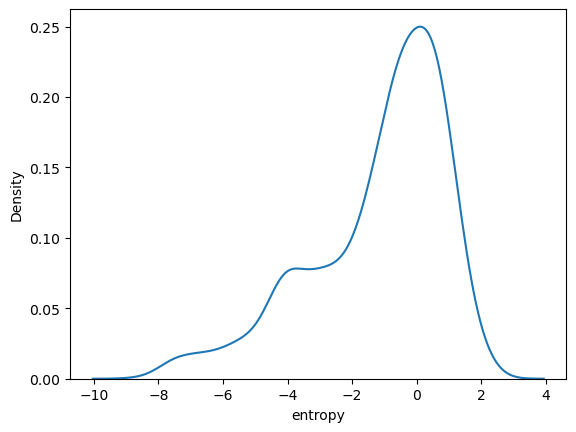

In [13]:
#Checking the distribution of the variables

cols=['variance', 'skewness', 'curtosis', 'entropy']

for col in cols:
    sns.kdeplot(data=df[col])
    plt.show()

In [14]:
#Segregating dependent and independent variables

X=df.drop('Target',axis=1)
y=df['Target']

In [15]:
X.shape,y.shape

((1372, 4), (1372,))

In [16]:
#Train and Test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1166, 4), (206, 4), (1166,), (206,))

In [17]:
#Scaling the Data

mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [18]:
#Model Building

In [19]:
classifier=Sequential()

In [20]:
X_train_scaled.shape,y_train.shape

((1166, 4), (1166,))

In [21]:
classifier.add(Dense(8,kernel_initializer='uniform',activation='relu',input_dim=4))
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [24]:
es=EarlyStopping(monitor='loss',patience=3)

In [25]:
h_callback=classifier.fit(X_train_scaled,y_train,batch_size=10,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
117/117 [==============================] - 2s 8ms/step - loss: 0.6884 - accuracy: 0.5583 - val_loss: 0.6807 - val_accuracy: 0.5583
Epoch 2/100
117/117 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.5583 - val_loss: 0.6602 - val_accuracy: 0.5583
Epoch 3/100
117/117 [==============================] - 1s 5ms/step - loss: 0.6487 - accuracy: 0.5823 - val_loss: 0.6351 - val_accuracy: 0.5969
Epoch 4/100
117/117 [==============================] - 1s 5ms/step - loss: 0.6210 - accuracy: 0.6535 - val_loss: 0.6052 - val_accuracy: 0.6638
Epoch 5/100
117/117 [==============================] - 1s 5ms/step - loss: 0.5905 - accuracy: 0.6955 - val_loss: 0.5738 - val_accuracy: 0.7264
Epoch 6/100
117/117 [==============================] - 1s 5ms/step - loss: 0.5589 - accuracy: 0.7530 - val_loss: 0.5433 - val_accuracy: 0.7521
Epoch 7/100
117/117 [==============================] - 1s 5ms/step - loss: 0.5299 - accuracy: 0.7779 - val_loss: 0.5151 - val_accuracy: 0.7839

Epoch 58/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0914 - accuracy: 0.9666 - val_loss: 0.0895 - val_accuracy: 0.9708
Epoch 59/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0899 - accuracy: 0.9683 - val_loss: 0.0878 - val_accuracy: 0.9691
Epoch 60/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0873 - accuracy: 0.9683 - val_loss: 0.0860 - val_accuracy: 0.9708
Epoch 61/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0856 - accuracy: 0.9717 - val_loss: 0.0845 - val_accuracy: 0.9648
Epoch 62/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0841 - accuracy: 0.9657 - val_loss: 0.0827 - val_accuracy: 0.9717
Epoch 63/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0830 - accuracy: 0.9691 - val_loss: 0.0812 - val_accuracy: 0.9708
Epoch 64/100
117/117 [==============================] - 1s 5ms/step - loss: 0.0810 - accuracy: 0.9691 - val_loss: 0.0803 - val_accuracy:

In [26]:
y_pred_test=classifier.predict(X_test_scaled)

7/7 [==============================] - 0s 3ms/step


In [27]:
y_pred_train=classifier.predict(X_train_scaled)

37/37 [==============================] - 0s 2ms/step


In [28]:
y_pred_train=np.round(y_pred_train)

In [29]:
y_pred_test=np.round(y_pred_test)

In [30]:
print('Model Train Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Model Test Accuracy is: ',accuracy_score(y_test,y_pred_test))
print('Model Recall_score is: ',recall_score(y_test,y_pred_test))
print('Model Precision_score is: ',precision_score(y_test,y_pred_test))
print('Model f1_score is: ',f1_score(y_test,y_pred_test))

Model Train Accuracy is:  0.9811320754716981
Model Test Accuracy is:  0.9805825242718447
Model Recall_score is:  0.9789473684210527
Model Precision_score is:  0.9789473684210527
Model f1_score is:  0.9789473684210527


In [31]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

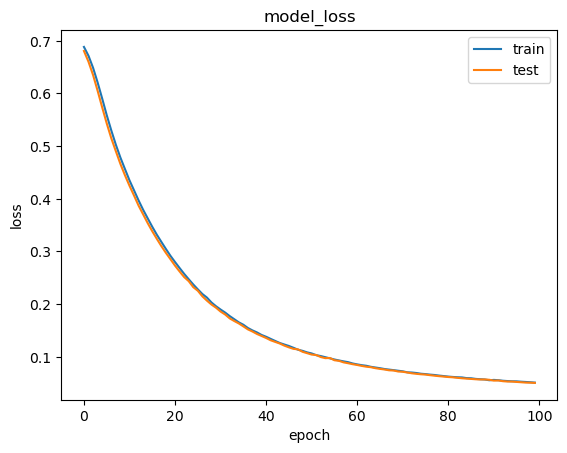

In [32]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

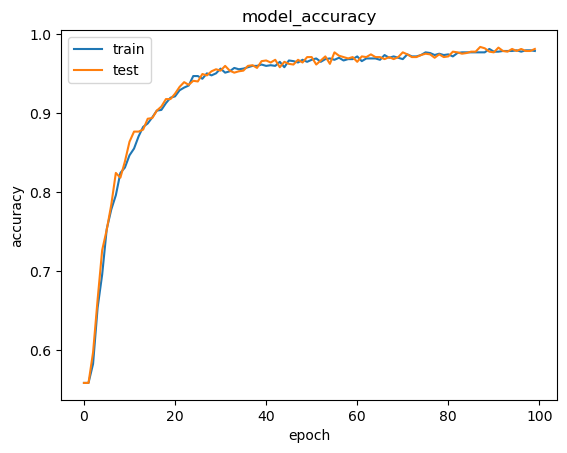

In [33]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [34]:
#Final Parameters

final_parameters = []

# Iterate over each layer in the model
for layer in classifier.layers:
    # Retrieve the weights and biases of the layer
    layer_weights = layer.get_weights()
    final_parameters.append(layer_weights)

# Print the final parameter values for each layer
for i, parameters in enumerate(final_parameters):
    print(f"Layer {i + 1} - Weights Shape: {parameters[0].shape}, Biases Shape: {parameters[1].shape}")
    print("Weights:")
    print(parameters[0])
    print("Biases:")
    print(parameters[1])
    print()

Layer 1 - Weights Shape: (4, 8), Biases Shape: (8,)
Weights:
[[-0.03966632  1.3254781   1.3569392  -1.1429539  -1.1488069   1.3070796
   1.2556143   0.02999468]
 [-0.04992492  1.0816566   1.0696799  -0.68932986 -0.69463336  1.0533218
   1.1127499   0.0124517 ]
 [-0.03853904  1.2078604   1.2115628  -0.940983   -0.90728515  1.2609135
   1.2555716  -0.02568509]
 [ 0.00294281 -0.11997388 -0.09058328  0.37602738  0.39840624 -0.05994143
  -0.07539572 -0.06306284]]
Biases:
[ 0.         -1.1480819  -1.1684375   1.4987128   1.4942158  -1.1943846
 -1.1962932  -0.01811425]

Layer 2 - Weights Shape: (8, 1), Biases Shape: (1,)
Weights:
[[-0.03284212]
 [-3.290249  ]
 [-3.233581  ]
 [ 3.814225  ]
 [ 3.69447   ]
 [-3.4170122 ]
 [-3.3940306 ]
 [ 0.01536426]]
Biases:
[0.9292983]

